# Introduction
Here, I subcluster for more granular phenotyping.

# Setup

In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
import itertools as it
import json
import seaborn as sns
import pickle as pkl
from functools import reduce

from nero import Nero as nr

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)
sc.settings.n_jobs=30

In [3]:
mountpoint = '/data/clue/'
prefix_atac = mountpoint + 'amo/atac/'

## Load in Data

In [4]:
concat_raw = sc.read_h5ad(prefix_atac + 'h5ads/concat_2.h5ad')

# Grouping and Subclustering

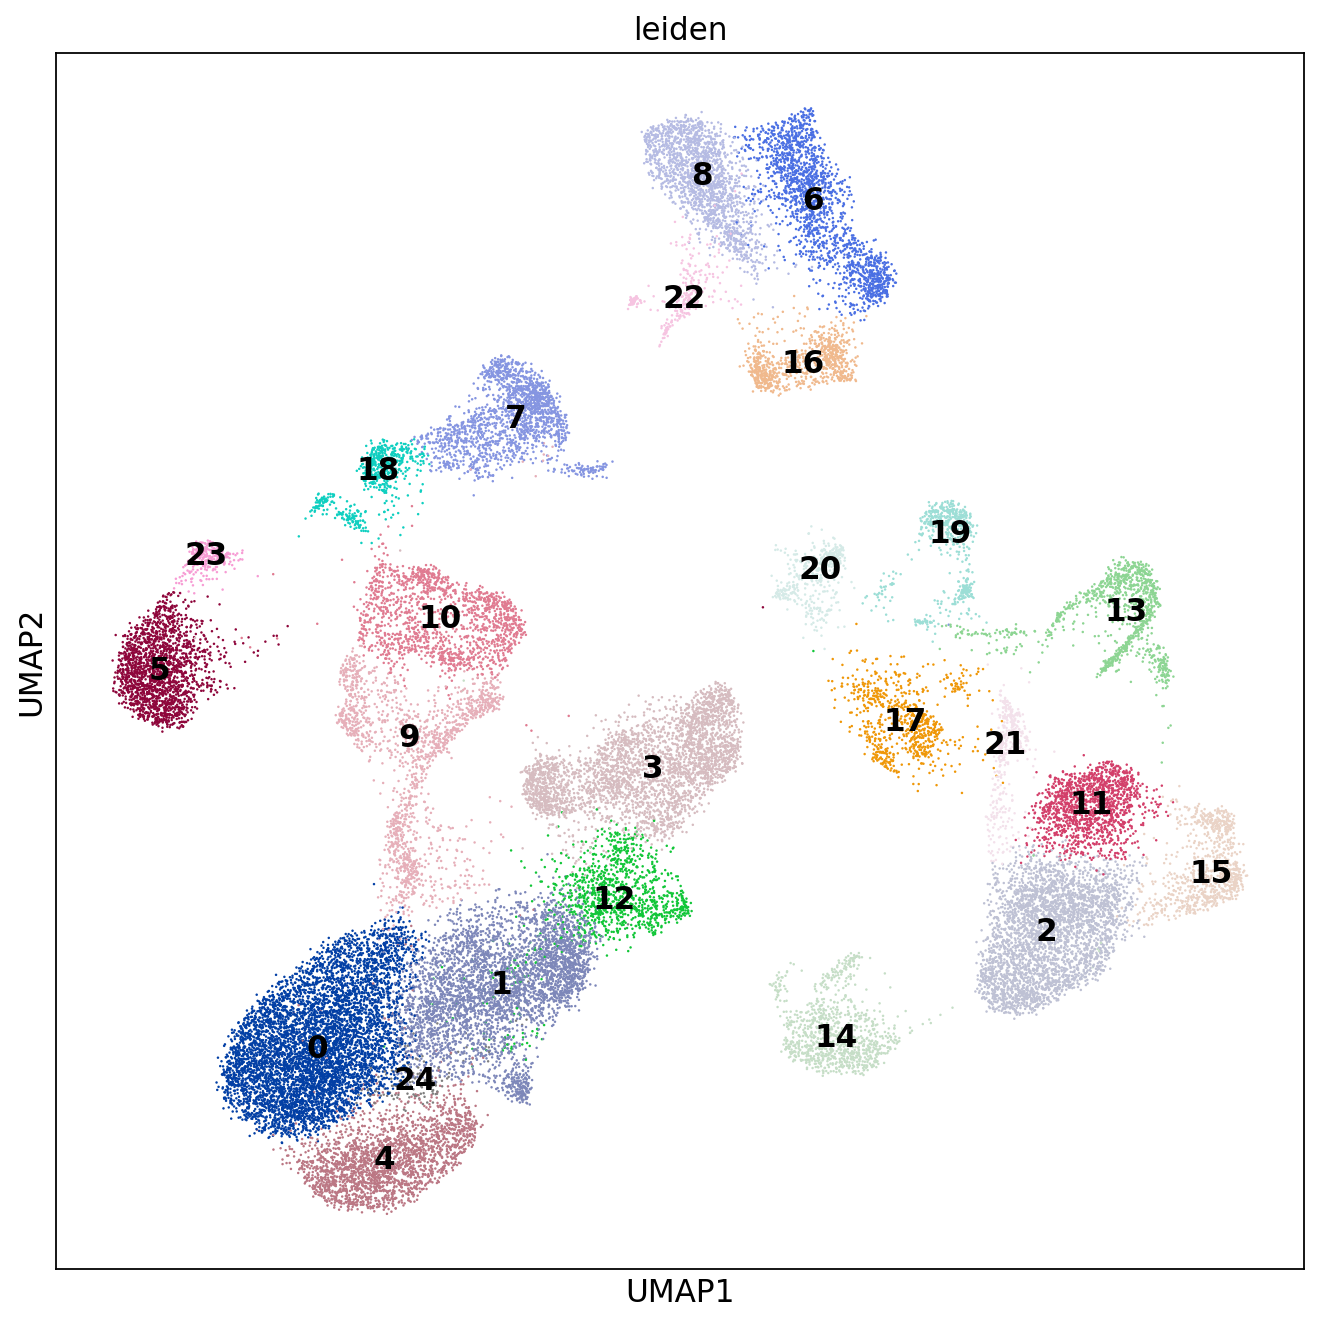

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for color, ax in zip(['leiden'], [ax]):
    sc.pl.umap(concat_raw, color=color, ax=ax, show=False, return_fig=False, size=5, legend_loc='on data')

In [6]:
clusts = [1, 3, 6, 7, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 22]

In [7]:
sub_concat_raw = dict() # put the new subsetted adata objects in a dictionary of concat_raw
for clust in clusts:
    sub_concat_raw[str(clust)] = concat_raw[concat_raw.obs['leiden'] == str(clust)].copy()

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


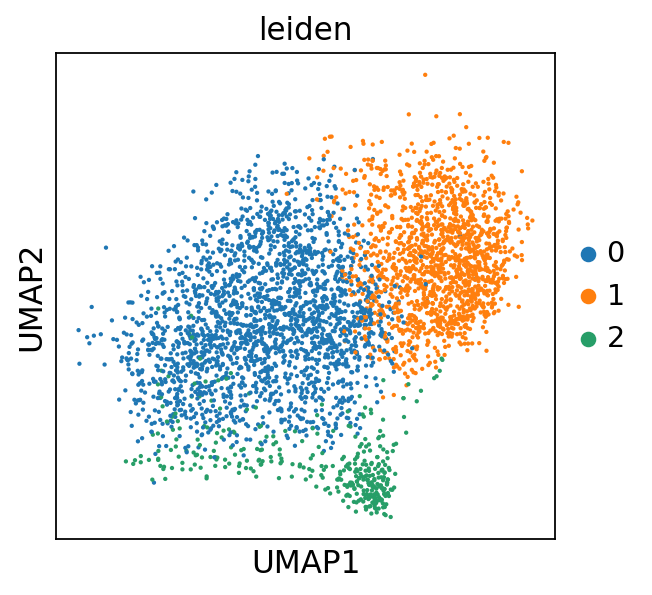

In [8]:
sc.tl.leiden(sub_concat_raw['1'], resolution=0.25) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['1'], color='leiden', size=15)

In [9]:
%load_ext autoreload

In [10]:
%autoreload 2

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
New number of clusters: 5


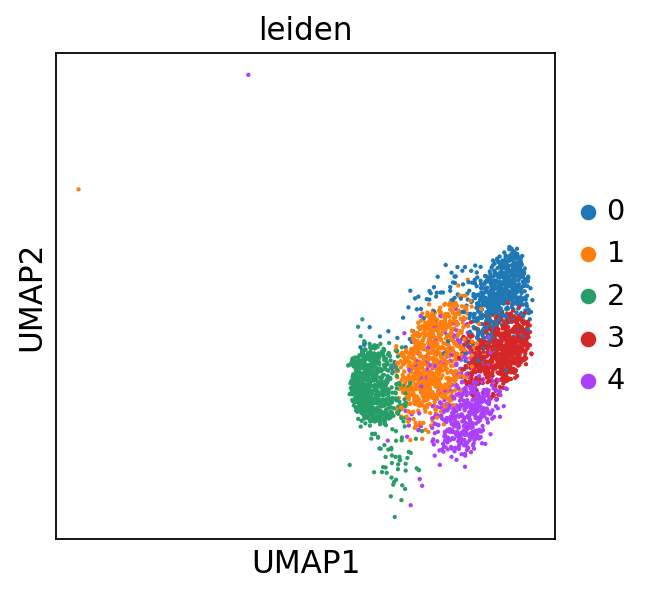

In [11]:
sc.tl.leiden(sub_concat_raw['3'], resolution=0.7) # subcluster them using Leiden
groupings = [[2, 5, 6]
             ]
nr.regroup(sub_concat_raw['3'], groupings)
sc.pl.umap(sub_concat_raw['3'], color='leiden', size=15)

running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


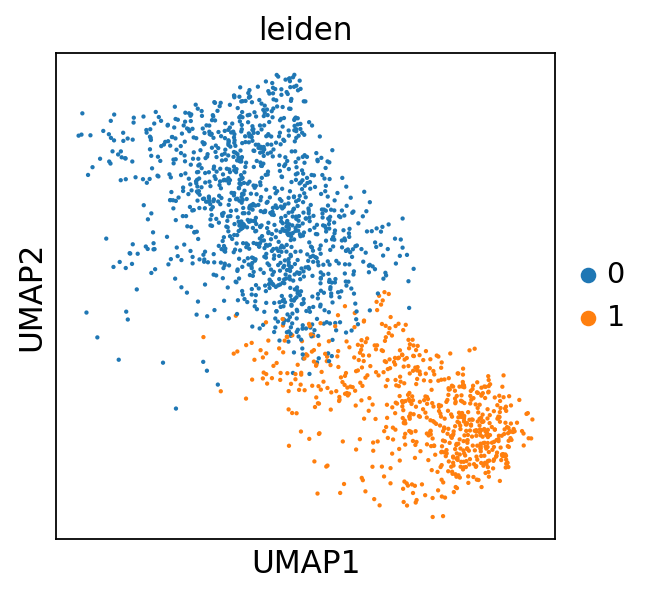

In [12]:
sc.tl.leiden(sub_concat_raw['6'], resolution=0.2) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['6'], color='leiden', size=15)

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


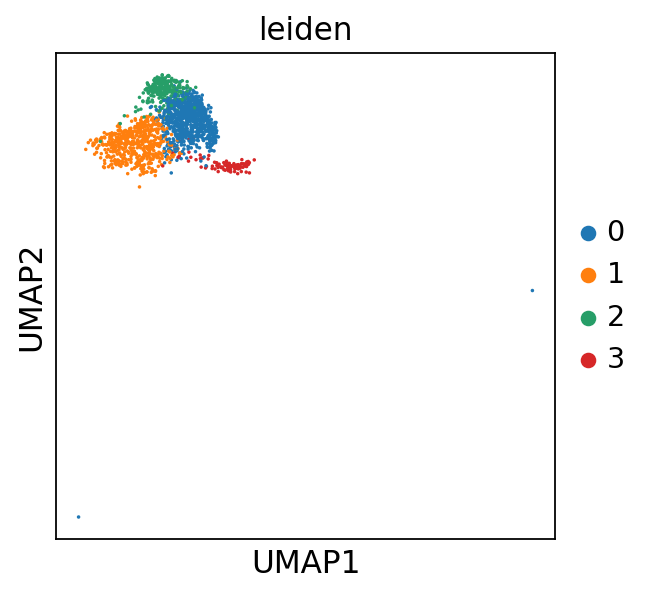

In [13]:
sc.tl.leiden(sub_concat_raw['7'], resolution=0.4) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['7'], color='leiden', size=10)

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


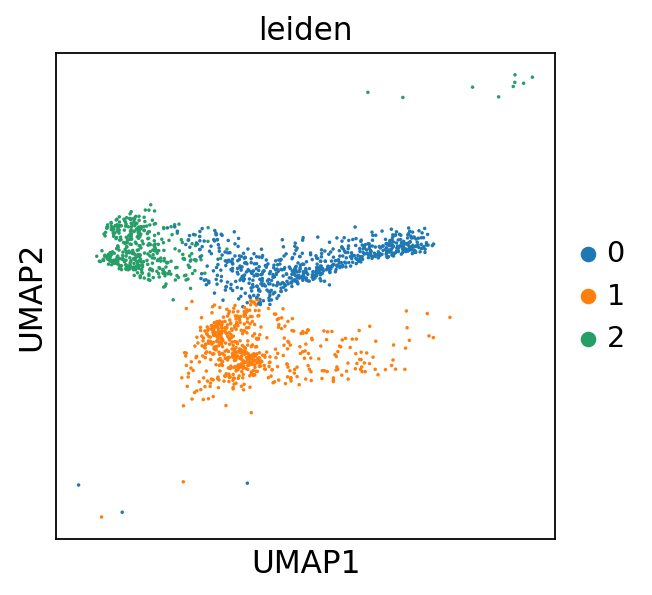

In [14]:
sc.tl.leiden(sub_concat_raw['9'], resolution=0.3) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['9'], color='leiden', size=10)

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


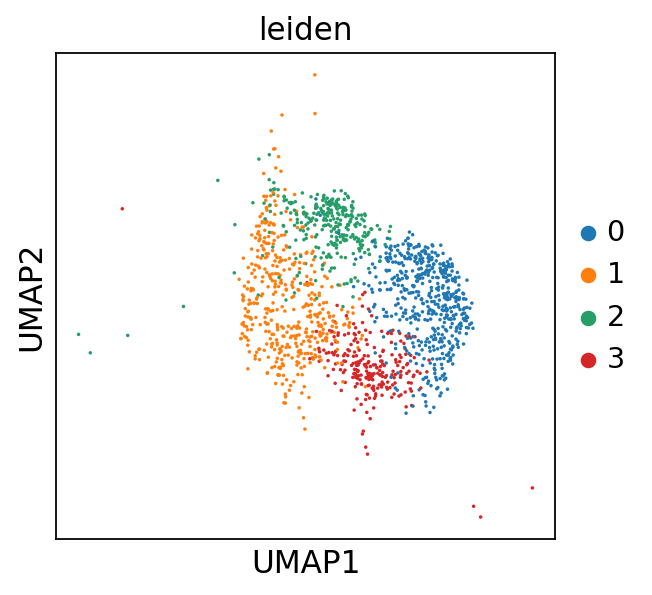

In [15]:
sc.tl.leiden(sub_concat_raw['10'], resolution=0.3) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['10'], color='leiden', size=10)

running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


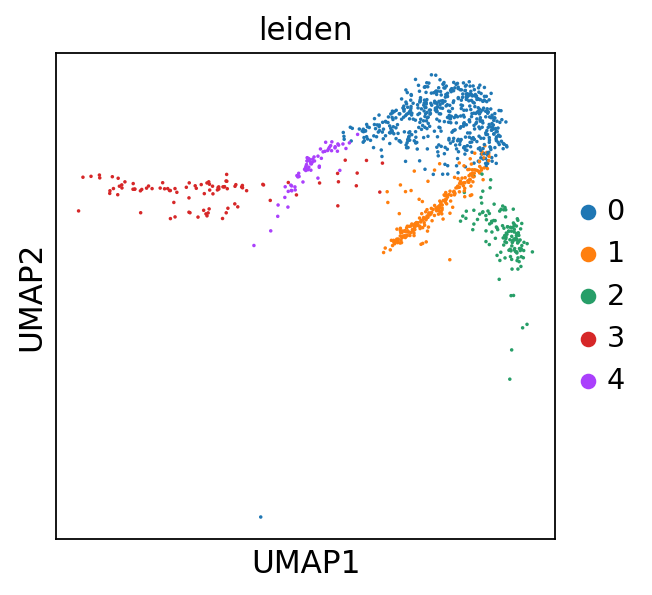

In [16]:
sc.tl.leiden(sub_concat_raw['13'], resolution=0.2) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['13'], color='leiden', size=10)

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


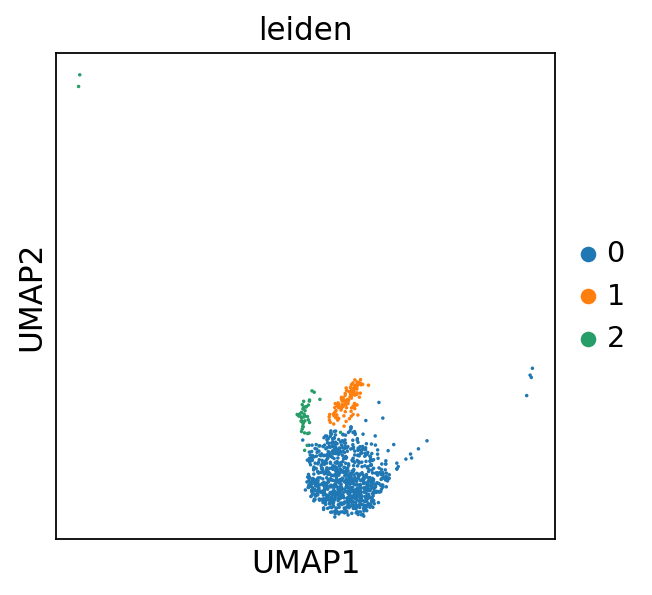

In [17]:
sc.tl.leiden(sub_concat_raw['14'], resolution=0.2) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['14'], color='leiden', size=10)

running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


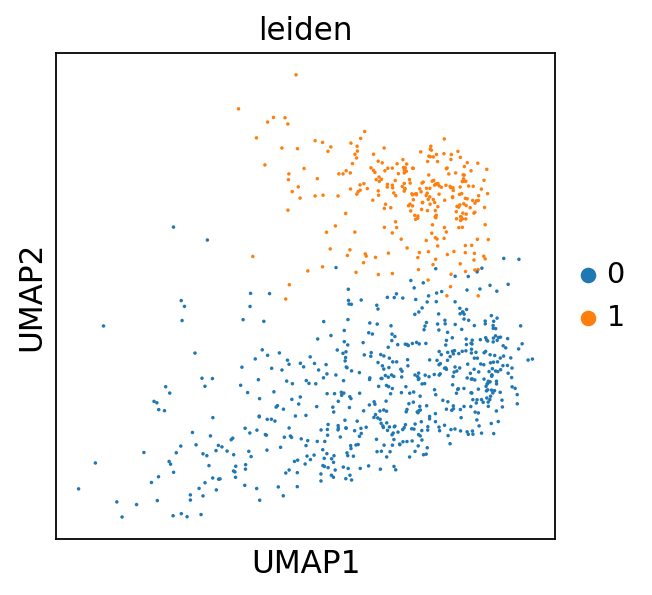

In [18]:
sc.tl.leiden(sub_concat_raw['15'], resolution=0.2) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['15'], color='leiden', size=10)

running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


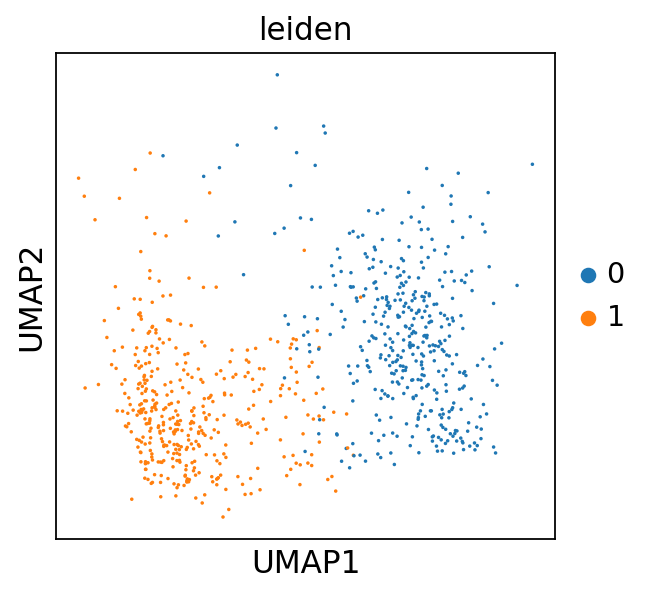

In [19]:
sc.tl.leiden(sub_concat_raw['16'], resolution=0.2) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['16'], color='leiden', size=10)

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


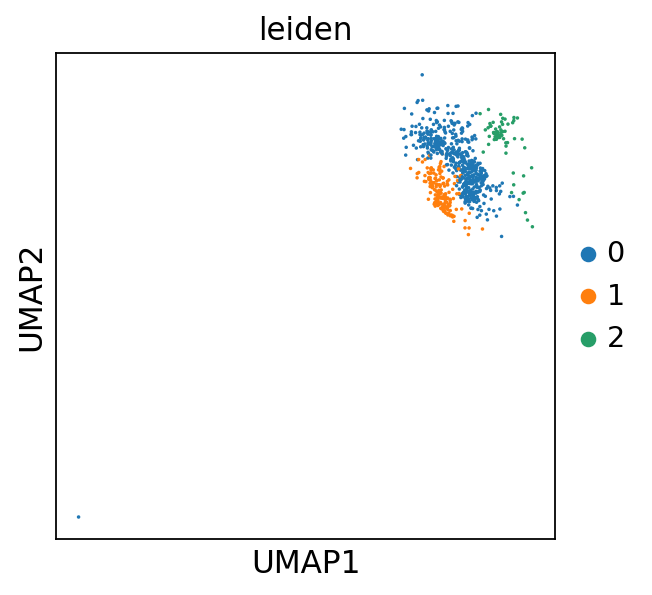

In [20]:
sc.tl.leiden(sub_concat_raw['17'], resolution=0.2) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['17'], color='leiden', size=10)

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


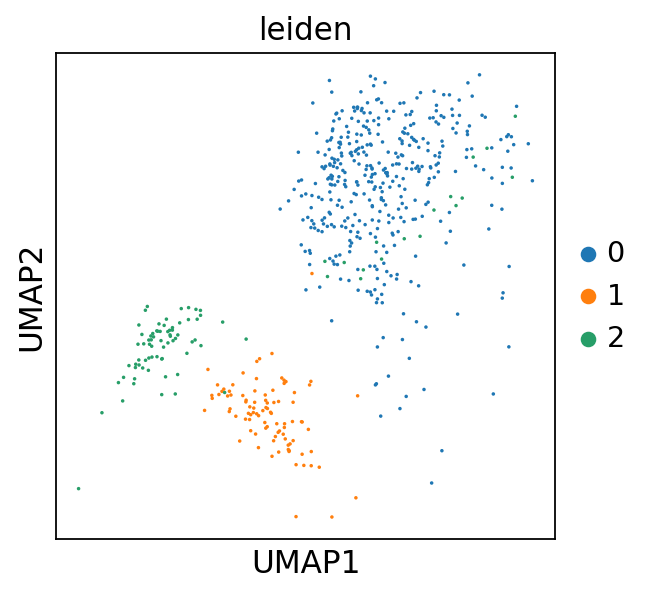

In [21]:
sc.tl.leiden(sub_concat_raw['18'], resolution=0.4) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['18'], color='leiden', size=10)

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


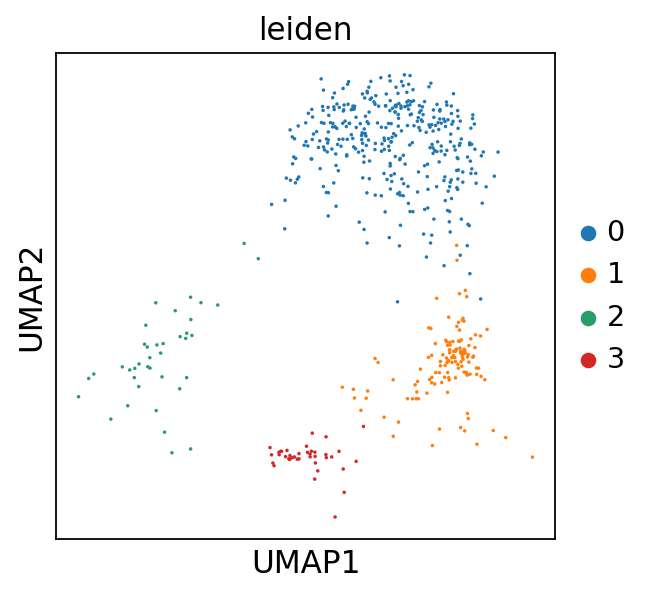

In [22]:
sc.tl.leiden(sub_concat_raw['19'], resolution=0.4) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['19'], color='leiden', size=10)

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


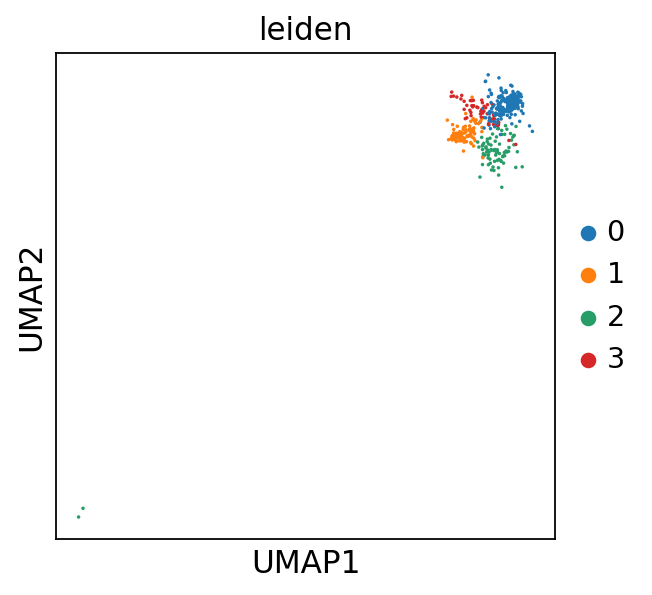

In [23]:
sc.tl.leiden(sub_concat_raw['20'], resolution=0.3) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['20'], color='leiden', size=10)

running Leiden clustering
    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


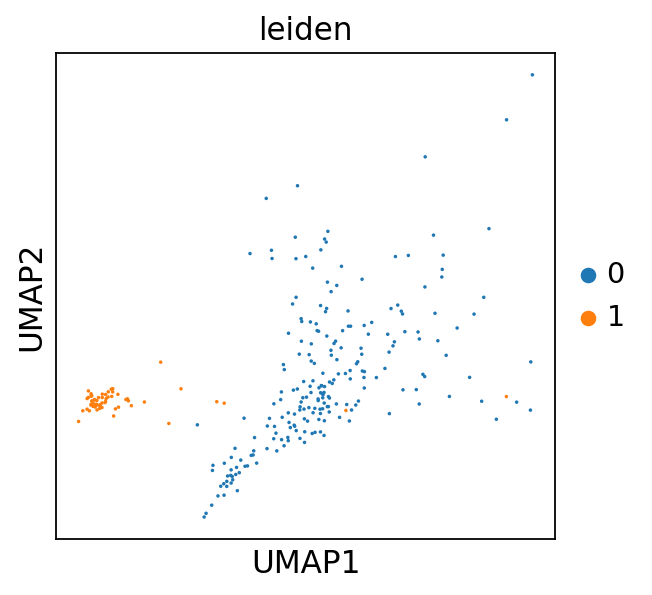

In [24]:
sc.tl.leiden(sub_concat_raw['22'], resolution=0.2) # subcluster them using Leiden
sc.pl.umap(sub_concat_raw['22'], color='leiden', size=10)

In [25]:
concat_raw = nr.subcluster_mapper(concat_raw, sub_concat_raw)

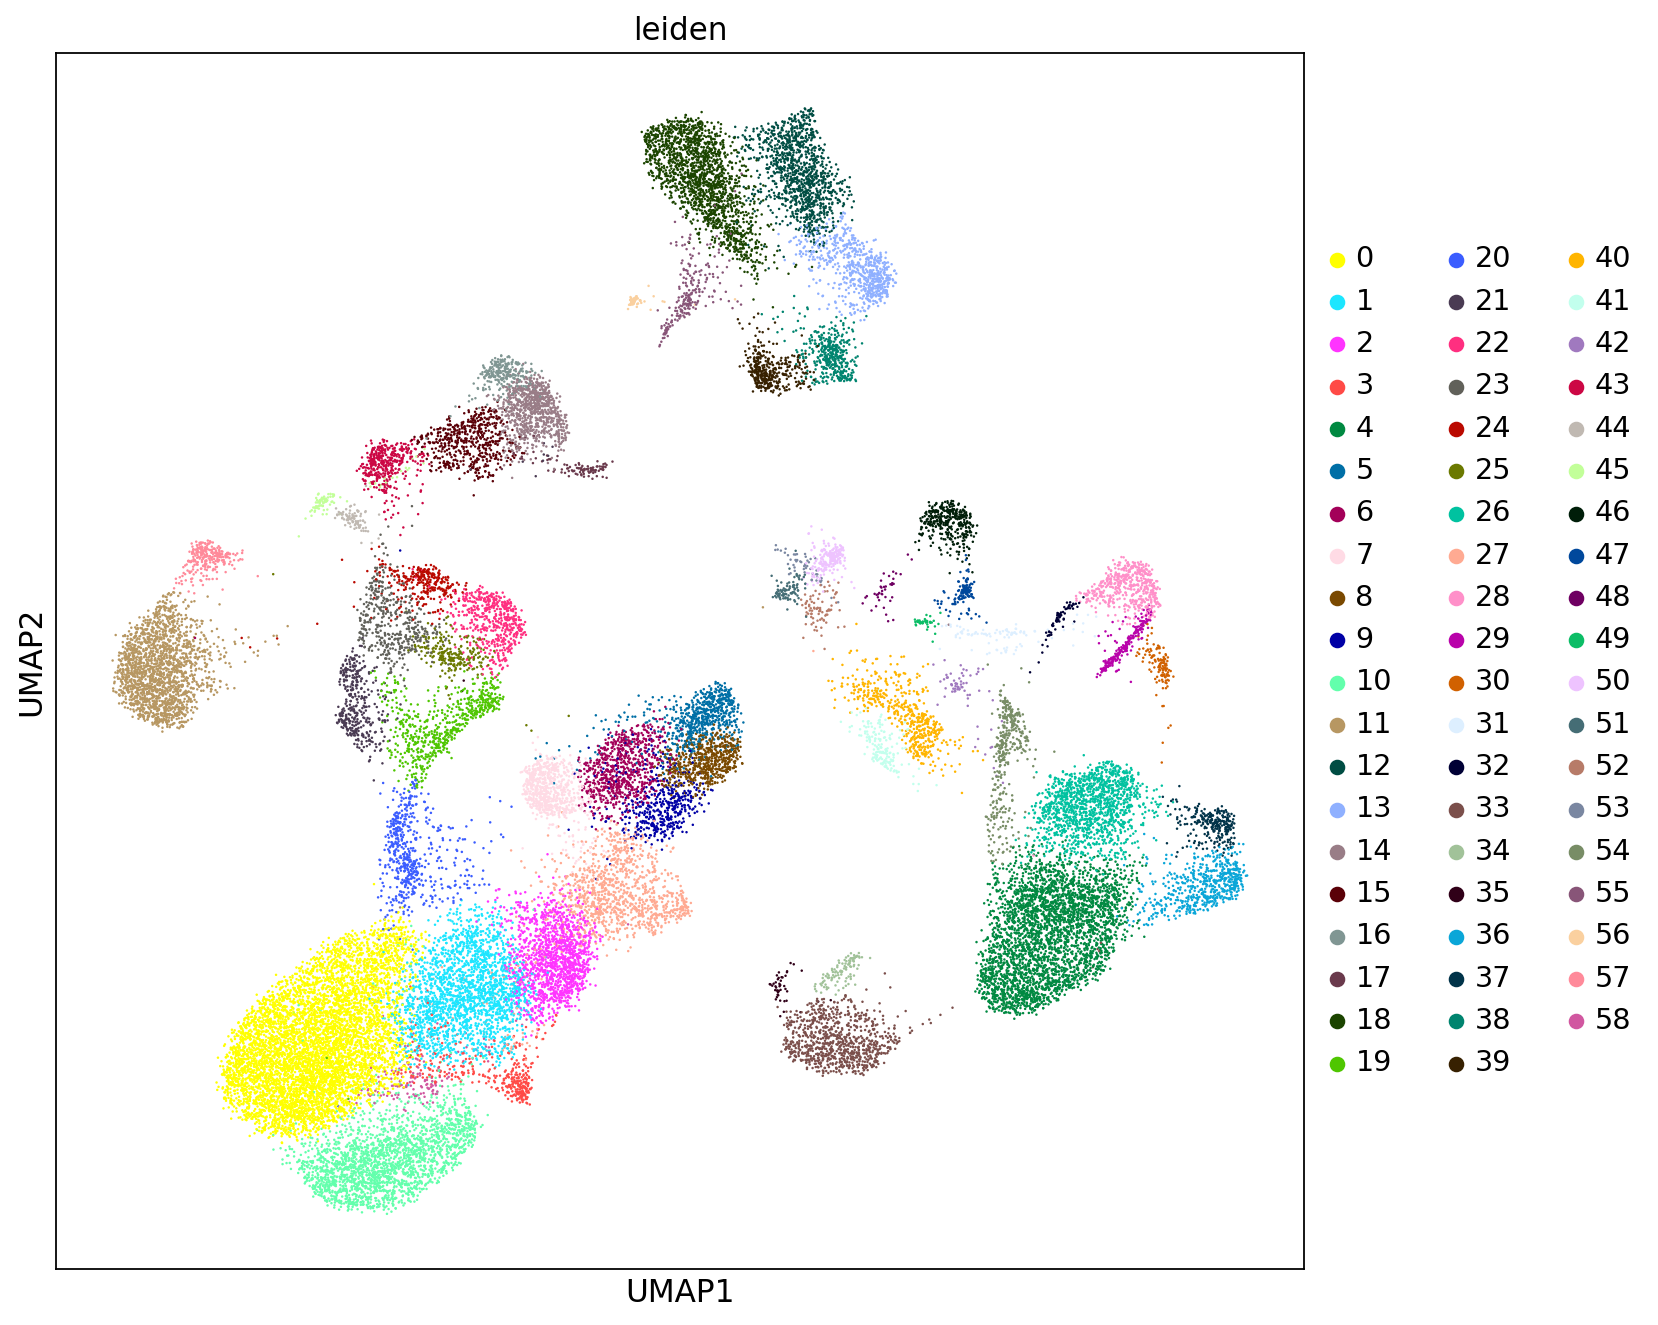

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for color, ax in zip(['leiden'], [ax]):
    sc.pl.umap(concat_raw, color=color, ax=ax, show=False, return_fig=False, size=5)

0it [00:00, ?it/s]

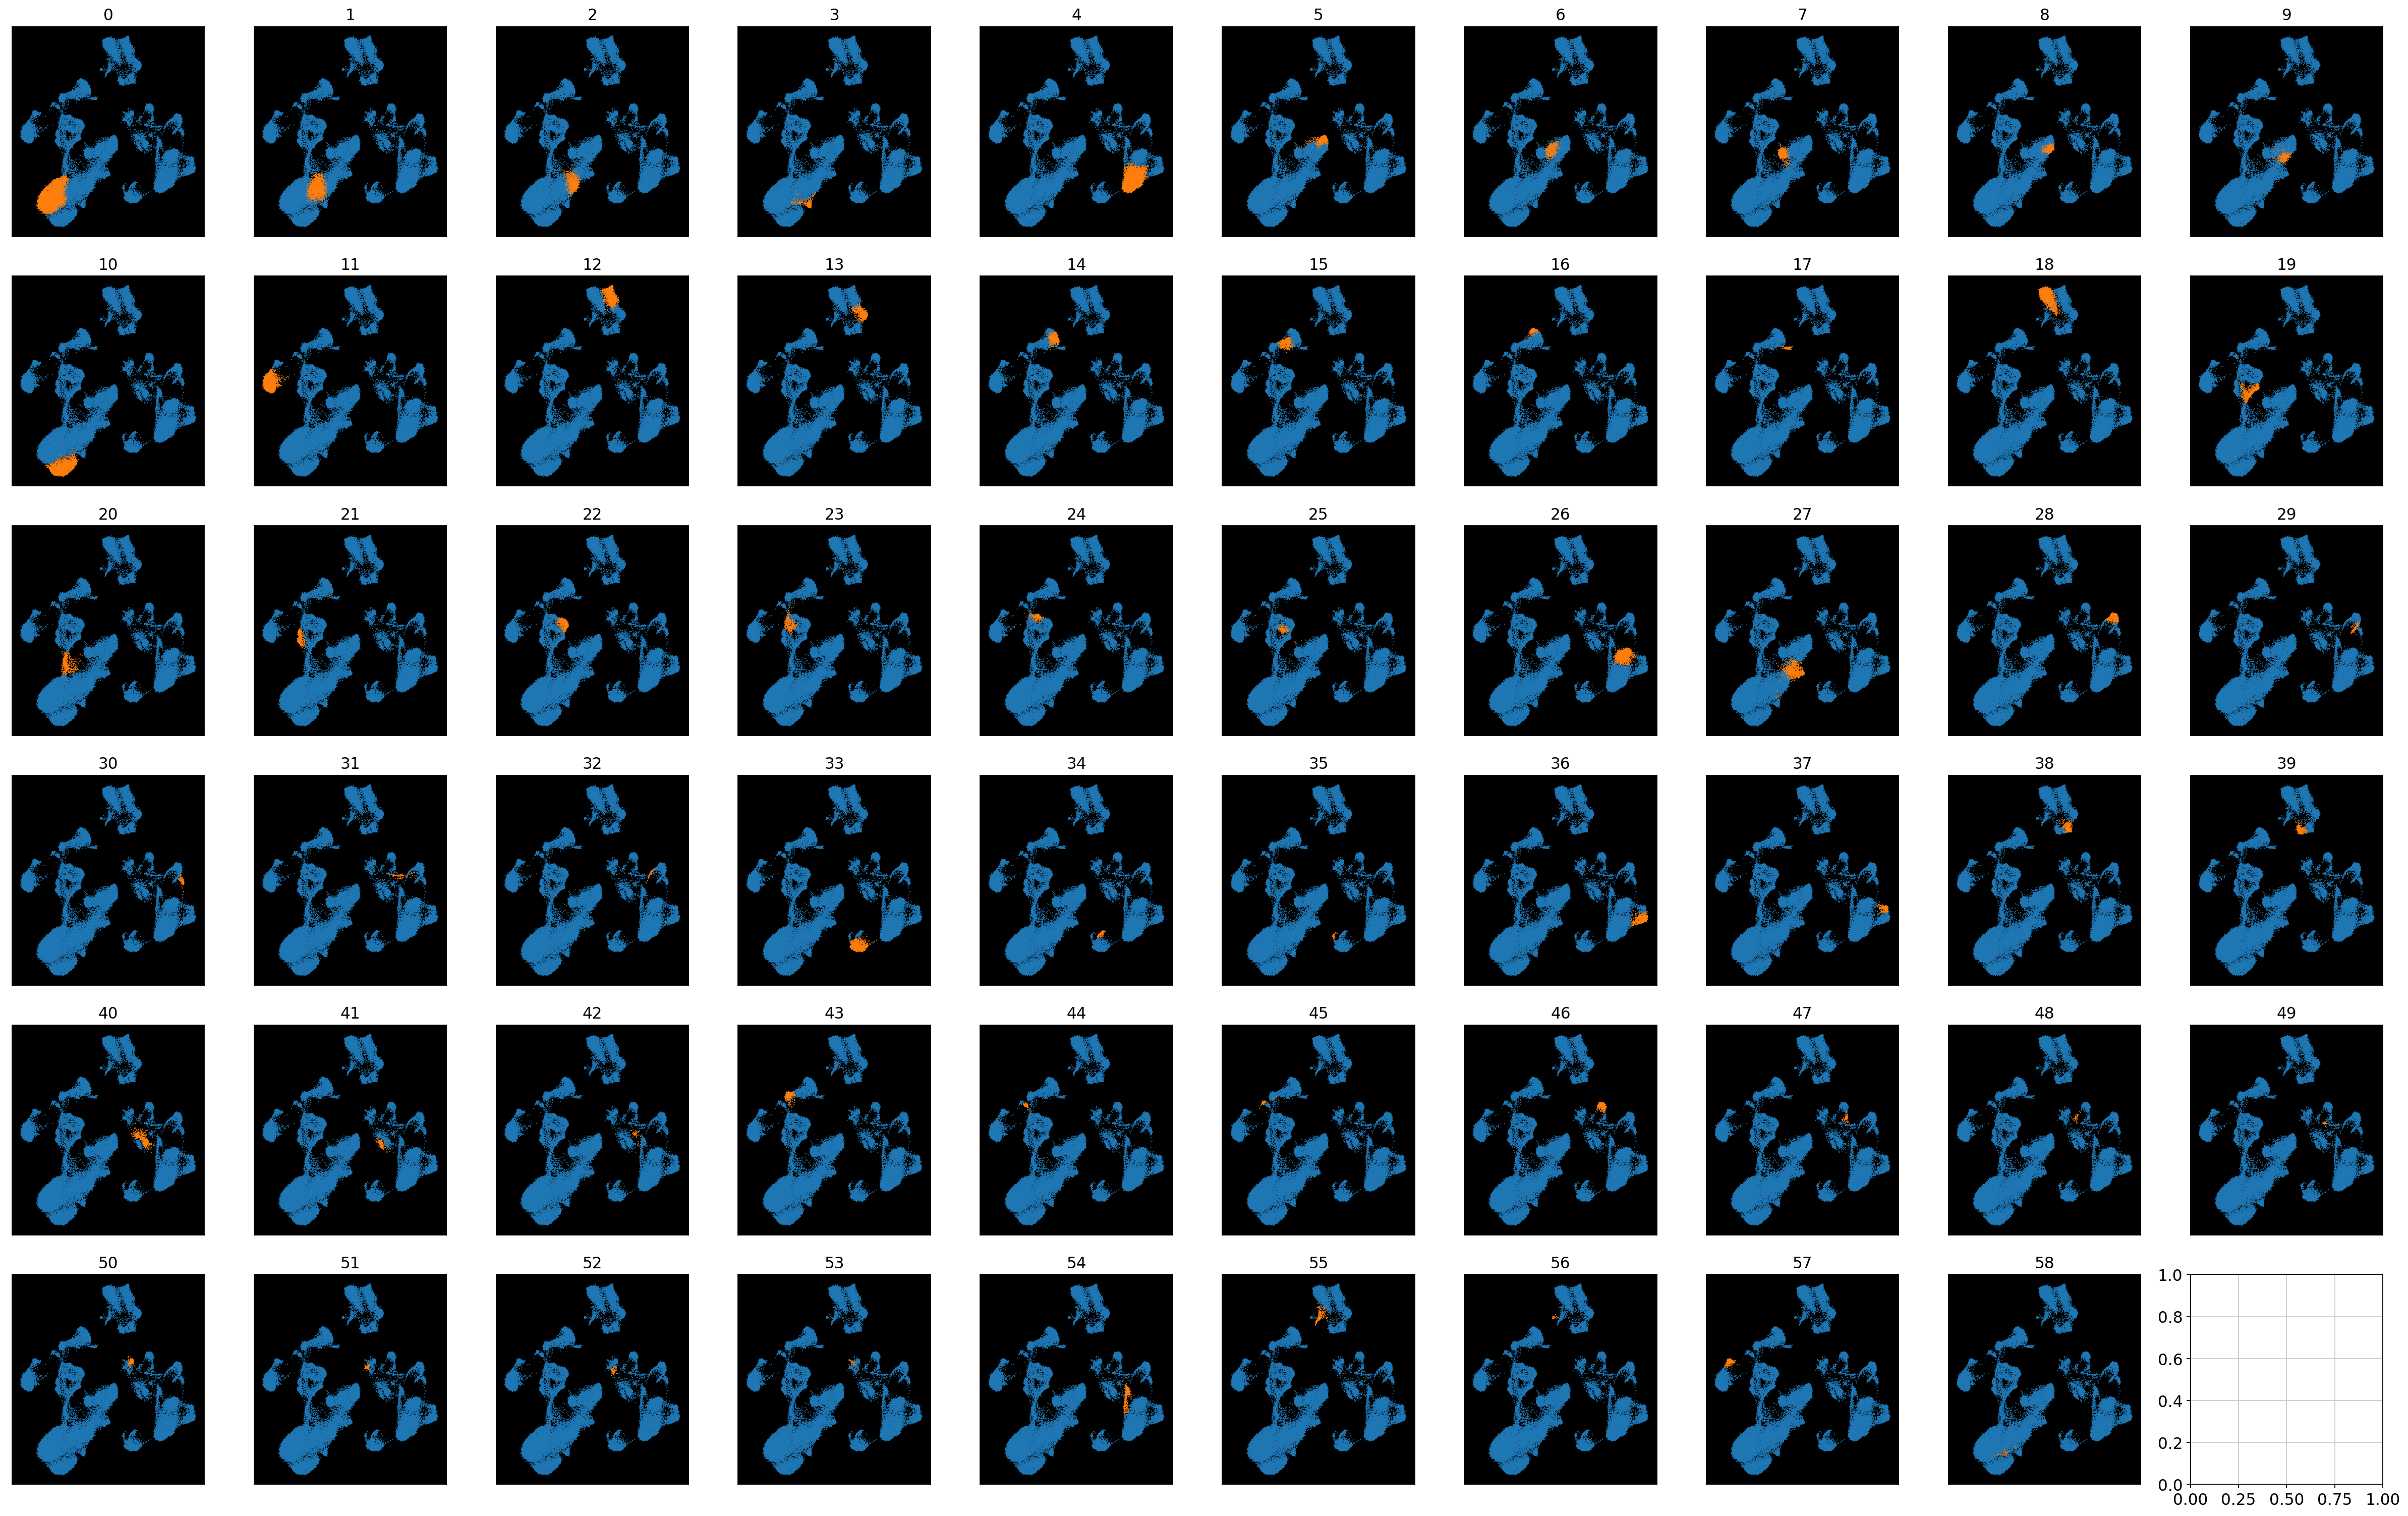

In [27]:
fig, ax = plt.subplots(6,10,figsize=(30,19))
for val, ax in tqdm(zip(concat_raw.obs['leiden'].dtype.categories, np.ravel(ax))):
    concat_raw.obs['val'] = (concat_raw.obs['leiden'] == val).astype('category')
    ax.set_facecolor('black')
    sc.pl.umap(concat_raw,color='val', ax=ax, show=False, return_fig=False, legend_loc=None, title=val)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    concat_raw.obs.drop(columns='val', inplace=True)
plt.tight_layout()

In [28]:
path = prefix_atac + 'h5ads/concat_3.h5ad'

# concat_raw.write_h5ad(path)
concat_raw = sc.read_h5ad(path)